# ML1 Project on FIFA World cup 2018 dataset

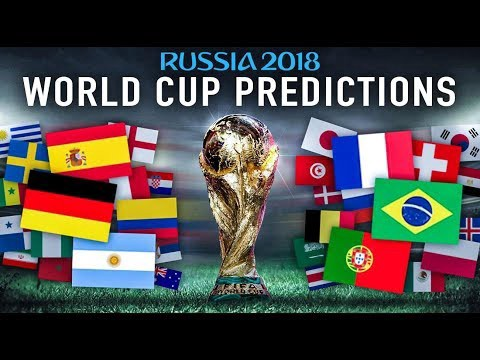

# 1. Introduction

FIFA is the governing body of world football. Every year, a digital video game is realesed by FIFA. In this kernel we will use the statistical information of football players from around the world in the game FIFA 18 which is updated for the season that starts in 2017 and ends in 2018, just before the World Cup in Russia.

## 1.1 Goal

 - The goal is to use Machine Learning to predict who is going to win the FIFA World Cup 2018.
 - Predict the outcome of individual matches for the entire competition.
 - Run simulation of the next matches i.e quarter finals, semi finals and finals.

These goals present a unique real-world Machine Learning prediction problem and involve solving various Machine Learning tasks: data integration, feature modelling and outcome prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [13]:
#load data 
world_cup = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/FIFA%202018%20Statistics.csv')
#results = pd.read_csv('datasets/results.csv')
results = pd.read_csv('https://raw.githubusercontent.com/mailtokedar/ML-Project-FIFA-2018/master/results.csv')

In [6]:
world_cup.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [7]:
world_cup.shape

(128, 27)

In [8]:
world_cup.dtypes

Date                       object
Team                       object
Opponent                   object
Goal Scored                 int64
Ball Possession %           int64
Attempts                    int64
On-Target                   int64
Off-Target                  int64
Blocked                     int64
Corners                     int64
Offsides                    int64
Free Kicks                  int64
Saves                       int64
Pass Accuracy %             int64
Passes                      int64
Distance Covered (Kms)      int64
Fouls Committed             int64
Yellow Card                 int64
Yellow & Red                int64
Red                         int64
Man of the Match           object
1st Goal                  float64
Round                      object
PSO                        object
Goals in PSO                int64
Own goals                 float64
Own goal Time             float64
dtype: object

In [14]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [15]:
#Adding goal difference and establishing who is the winner 
winner = []
for i in range (len(results['home_team'])):
    if results ['home_score'][i] > results['away_score'][i]:
        winner.append(results['home_team'][i])
    elif results['home_score'][i] < results ['away_score'][i]:
        winner.append(results['away_team'][i])
    else:
        winner.append('Draw')
results['winning_team'] = winner

#adding goal difference column
results['goal_difference'] = np.absolute(results['home_score'] - results['away_score'])

results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,3


In [16]:
#narrowing to team patcipating in the world cup
worldcup_teams = ['Australia', ' Iran', 'Japan', 'Korea Republic', 
            'Saudi Arabia', 'Egypt', 'Morocco', 'Nigeria', 
            'Senegal', 'Tunisia', 'Costa Rica', 'Mexico', 
            'Panama', 'Argentina', 'Brazil', 'Colombia', 
            'Peru', 'Uruguay', 'Belgium', 'Croatia', 
            'Denmark', 'England', 'France', 'Germany', 
            'Iceland', 'Poland', 'Portugal', 'Russia', 
            'Serbia', 'Spain', 'Sweden', 'Switzerland']
df_teams_home = results[results['home_team'].isin(worldcup_teams)]
df_teams_away = results[results['away_team'].isin(worldcup_teams)]
df_teams = pd.concat((df_teams_home, df_teams_away))
df_teams.drop_duplicates()
df_teams.count()

date               20482
home_team          20482
away_team          20482
home_score         20482
away_score         20482
tournament         20482
city               20482
country            20482
neutral            20482
winning_team       20482
goal_difference    20482
dtype: int64

In [17]:
df_teams.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,2
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw,0
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,Scotland,2
10,1879-01-18,England,Wales,2,1,Friendly,London,England,False,England,1
11,1879-04-05,England,Scotland,5,4,Friendly,London,England,False,England,1


In [18]:
#create an year column to drop games before 1930
year = []
for row in df_teams['date']:
    year.append(int(row[:4]))
df_teams['match_year'] = year
df_teams_1930 = df_teams[df_teams.match_year >= 1930]
df_teams_1930.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference,match_year
1252,1930-01-01,Spain,Czechoslovakia,1,0,Friendly,Barcelona,Spain,False,Spain,1,1930
1253,1930-01-12,Portugal,Czechoslovakia,1,0,Friendly,Lisbon,Portugal,False,Portugal,1,1930
1259,1930-02-23,Portugal,France,2,0,Friendly,Porto,Portugal,False,Portugal,2,1930
1260,1930-03-02,Germany,Italy,0,2,Friendly,Frankfurt am Main,Germany,False,Italy,2,1930
1262,1930-03-23,France,Switzerland,3,3,Friendly,Colombes,France,False,Draw,0,1930


In [19]:
#dropping columns that wll not affect matchoutcomes
df_teams_1930 = df_teams.drop(['date', 'home_score', 'away_score', 'tournament', 'city', 'country', 'goal_difference', 'match_year'], axis=1)
df_teams_1930.head()

,home_team,away_team,neutral,winning_team
1,England,Scotland,False,England
3,England,Scotland,False,Draw
6,England,Scotland,False,Scotland
10,England,Wales,False,England
11,England,Scotland,False,England


In [20]:
#Building the model
#the prediction label: The winning_team column will show "2" if the home team has won, "1" if it was a tie, and "0" if the away team has won.

df_teams_1930 = df_teams_1930.reset_index(drop=True)
df_teams_1930.loc[df_teams_1930.winning_team == df_teams_1930.home_team,'winning_team']=2
df_teams_1930.loc[df_teams_1930.winning_team == 'Draw', 'winning_team']=1
df_teams_1930.loc[df_teams_1930.winning_team == df_teams_1930.away_team, 'winning_team']=0

df_teams_1930.head()

,home_team,away_team,neutral,winning_team
0,England,Scotland,False,2
1,England,Scotland,False,1
2,England,Scotland,False,0
3,England,Wales,False,2
4,England,Scotland,False,2


In [35]:
#convert home team and away team from categorical variables to continous inputs 
# Get dummy variables
final = pd.get_dummies(df_teams_1930, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

# Separate X and y sets
X = final.drop(['winning_team'], axis=1)
y = final["winning_team"]
y = y.astype('int')

# Separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [36]:
final.head()

,neutral,winning_team,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andalusia,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,...,away_team_Vanuatu,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,False,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,False,2,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,False,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

C:\Users\kedarnath.r\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kedarnath.r\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training set accuracy:  0.579
Test set accuracy:  0.552


In [38]:
#adding Fifa rankings
#the team which is positioned higher on the FIFA Ranking will be considered "favourite" for the match
#and therefore, will be positioned under the "home_teams" column
#since there are no "home" or "away" teams in World Cup games. 

# Loading new datasets
#ranking = pd.read_csv('https://raw.githubusercontent.com/mailtokedar/ML-Project-FIFA-2018/master/fifa_ranking.csv') 
#ranking = pd.read_csv('https://raw.githubusercontent.com/codecentric/soccer-prediction-2014/master/3-compute-features/1-fifa-ranking/input/fifa-rankings.csv')
ranking = pd.read_csv('https://raw.githubusercontent.com/mailtokedar/ML-Project-FIFA-2018/master/rankings.csv')
fixtures = pd.read_csv('https://raw.githubusercontent.com/mailtokedar/ML-Project-FIFA-2018/master/fixtures.csv')

# List for storing the group stage games
pred_set = []

In [39]:
# Create new columns with ranking position of each team
fixtures.insert(1, 'first_position', fixtures['Home Team'].map(ranking.set_index('Team')['Position']))
fixtures.insert(2, 'second_position', fixtures['Away Team'].map(ranking.set_index('Team')['Position']))

# We only need the group stage games, so we have to slice the dataset
fixtures = fixtures.iloc[:48, :]
fixtures.tail()

,Round Number,first_position,second_position,Date,Location,Home Team,Away Team,Group,Result
43,3,2,1,27/06/2018 21:00,Nizhny Novgorod Stadium,Switzerland,Costa Rica,Group E,2 - 2
44,3,-5,-4,28/06/2018 17:00,Volgograd Stadium,Japan,Poland,Group H,0 - 1
45,3,-1,-3,28/06/2018 17:00,Samara Stadium,Senegal,Colombia,Group H,0 - 1
46,3,-2,9,28/06/2018 21:00,Saransk Stadium,Panama,Tunisia,Group G,1 - 2
47,3,3,2,28/06/2018 21:00,Kaliningrad Stadium,England,Belgium,Group G,0 - 1


In [40]:
# Loop to add teams to new prediction dataset based on the ranking position of each team
for index, row in fixtures.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'home_team': row['Home Team'], 'away_team': row['Away Team'], 'winning_team': None})
    else:
        pred_set.append({'home_team': row['Away Team'], 'away_team': row['Home Team'], 'winning_team': None})
        
pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set

pred_set.head()

,away_team,home_team,winning_team
0,Russia,Saudi Arabia,None
1,Uruguay,Egypt,None
2,Iran,Morocco,None
3,Portugal,Spain,None
4,France,Australia,None


In [41]:
# Get dummy variables and drop winning_team column
pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

# Add missing columns compared to the model's training dataset
missing_cols = set(final.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]

# Remove winning team column
pred_set = pred_set.drop(['winning_team'], axis=1)

pred_set.head()

,neutral,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andalusia,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,...,away_team_Vanuatu,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
#group matches 
predictions = logreg.predict(pred_set)
for i in range(fixtures.shape[0]):
    print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
    if predictions[i] == 2:
        print("Winner: " + backup_pred_set.iloc[i, 1])
    elif predictions[i] == 1:
        print("Draw")
    elif predictions[i] == 0:
        print("Winner: " + backup_pred_set.iloc[i, 0])
    print('Probability of ' + backup_pred_set.iloc[i, 1] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][2]))
    print('Probability of Draw: ', '%.3f'%(logreg.predict_proba(pred_set)[i][1]))
    print('Probability of ' + backup_pred_set.iloc[i, 0] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
    print("")

Saudi Arabia and Russia
Winner: Russia
Probability of Saudi Arabia winning:  0.175
Probability of Draw:  0.289
Probability of Russia winning:  0.536

Egypt and Uruguay
Winner: Uruguay
Probability of Egypt winning:  0.373
Probability of Draw:  0.192
Probability of Uruguay winning:  0.435

Morocco and Iran
Winner: Morocco
Probability of Morocco winning:  0.537
Probability of Draw:  0.355
Probability of Iran winning:  0.107

Spain and Portugal
Winner: Spain
Probability of Spain winning:  0.644
Probability of Draw:  0.201
Probability of Portugal winning:  0.155

Australia and France
Winner: France
Probability of Australia winning:  0.344
Probability of Draw:  0.234
Probability of France winning:  0.421

Argentina and Iceland
Winner: Argentina
Probability of Argentina winning:  0.830
Probability of Draw:  0.143
Probability of Iceland winning:  0.027

Denmark and Peru
Winner: Denmark
Probability of Denmark winning:  0.569
Probability of Draw:  0.250
Probability of Peru winning:  0.182

Croat

In [91]:

# List of tuples before 
group_16 = [('Uruguay', 'Portugal'),
            ('France', 'Argentina'),
            ('Brazil', 'Mexico'),
            ('Japan', 'Belgium'),
            ('Spain', 'Russia'),
            ('Croatia', 'Denmark'),
            ('England', 'Colombia'),
            #('Germany', 'Costa Rica'),
            ('Sweden', 'Switzerland'),
            ]

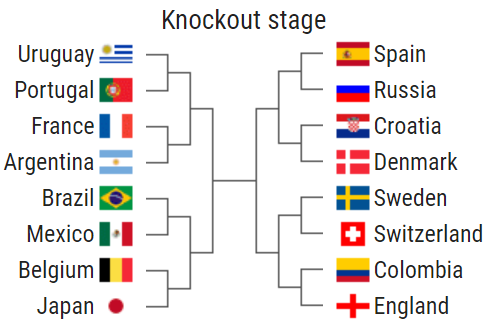

In [79]:
def clean_and_predict(matches, ranking, final, logreg):

    # Initialization of auxiliary list for data cleaning
    positions = []

    # Loop to retrieve each team's position according to FIFA ranking
    for match in matches:
        positions.append(ranking.loc[ranking['Team'] == match[0],'Position'].iloc[0])
        positions.append(ranking.loc[ranking['Team'] == match[1],'Position'].iloc[0])
    
    # Creating the DataFrame for prediction
    pred_set = []

    # Initializing iterators for while loop
    i = 0
    j = 0

    # 'i' will be the iterator for the 'positions' list, and 'j' for the list of matches (list of tuples)
    while i < len(positions):
        dict1 = {}

        # If position of first team is better, he will be the 'home' team, and vice-versa
        if positions[i] < positions[i + 1]:
            dict1.update({'home_team': matches[j][0], 'away_team': matches[j][1]})
        else:
            dict1.update({'home_team': matches[j][1], 'away_team': matches[j][0]})

        # Append updated dictionary to the list, that will later be converted into a DataFrame
        pred_set.append(dict1)
        i += 2
        j += 1
        
        #print("Kedar", pred_set)

    # Convert list into DataFramek
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set

    # Get dummy variables and drop winning_team column
    pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

    # Add missing columns compared to the model's training dataset
    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]

    # Remove winning team column
    pred_set = pred_set.drop(['winning_team'], axis=1)

    # Predict!
    predictions = logreg.predict(pred_set)
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
        if predictions[i] == 2:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        elif predictions[i] == 1:
            print("Draw")
        elif predictions[i] == 0:
            print("Winner: " + backup_pred_set.iloc[i, 0])
        print('Probability of ' + backup_pred_set.iloc[i, 1] + ' winning: ' , '%.3f'%(logreg.predict_proba(pred_set)[i][2]))
        print('Probability of Draw: ', '%.3f'%(logreg.predict_proba(pred_set)[i][1])) 
        print('Probability of ' + backup_pred_set.iloc[i, 0] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
        print("")

In [92]:
clean_and_predict(group_16, ranking, final, logreg)

Portugal and Uruguay
Winner: Portugal
Probability of Portugal winning:  0.490
Probability of Draw:  0.281
Probability of Uruguay winning:  0.229

Argentina and France
Winner: Argentina
Probability of Argentina winning:  0.681
Probability of Draw:  0.203
Probability of France winning:  0.115

Brazil and Mexico
Winner: Brazil
Probability of Brazil winning:  0.752
Probability of Draw:  0.169
Probability of Mexico winning:  0.079

Japan and Belgium
Winner: Belgium
Probability of Japan winning:  0.309
Probability of Draw:  0.249
Probability of Belgium winning:  0.442

Spain and Russia
Winner: Spain
Probability of Spain winning:  0.548
Probability of Draw:  0.284
Probability of Russia winning:  0.168

Denmark and Croatia
Winner: Denmark
Probability of Denmark winning:  0.427
Probability of Draw:  0.268
Probability of Croatia winning:  0.305

Colombia and England
Winner: England
Probability of Colombia winning:  0.246
Probability of Draw:  0.304
Probability of England winning:  0.449

Sweden 

In [93]:
# List of matches
quarters = [('Portugal', 'Argentina'),
            ('Brazil', 'Belgium'),
            ('Spain', 'Denmark'),
            ('Sweden', 'England')]

In [94]:
clean_and_predict(quarters, ranking, final, logreg)

Argentina and Portugal
Winner: Argentina
Probability of Argentina winning:  0.682
Probability of Draw:  0.210
Probability of Portugal winning:  0.108

Brazil and Belgium
Winner: Brazil
Probability of Brazil winning:  0.729
Probability of Draw:  0.177
Probability of Belgium winning:  0.095

Denmark and Spain
Winner: Spain
Probability of Denmark winning:  0.317
Probability of Draw:  0.252
Probability of Spain winning:  0.431

Sweden and England
Winner: England
Probability of Sweden winning:  0.293
Probability of Draw:  0.302
Probability of England winning:  0.405



In [95]:
# List of matches
semi = [('Argentina', 'Brazil'),
        ('Spain', 'England')]

In [96]:
clean_and_predict(semi, ranking, final, logreg)

Brazil and Argentina
Winner: Brazil
Probability of Brazil winning:  0.605
Probability of Draw:  0.226
Probability of Argentina winning:  0.170

Spain and England
Winner: Spain
Probability of Spain winning:  0.465
Probability of Draw:  0.271
Probability of England winning:  0.265



In [97]:
# Finals
finals = [('Brazil', 'Spain')]

In [98]:
clean_and_predict(finals, ranking, final, logreg)

Brazil and Spain
Winner: Brazil
Probability of Brazil winning:  0.600
Probability of Draw:  0.229
Probability of Spain winning:  0.172



In [99]:
# Third place
third_place = [('England', 'Argentina')]

In [100]:
clean_and_predict(third_place, ranking, final, logreg)

Argentina and England
Winner: Argentina
Probability of Argentina winning:  0.522
Probability of Draw:  0.285
Probability of England winning:  0.192

